In [1]:
import pandas as pd

# CSV'yi baştan yükle
df = pd.read_csv("/content/cleaned_reviews_5000 (1).csv")

# İlk 5 satıra bak bakalım düzgün mü
df.head()


,category,rating,label,text_,user_id,date,translated_text
0,Electronics_5,5.0,0,I've replaced all my other fountain filters an...,7334,2022-09-12,Diğer tüm çeşme filtrelerimi değiştirdim ve re...
1,Electronics_5,5.0,0,LT&T did not disappoint. We have the characte...,8490,2022-12-11,LT&T hayal kırıklığına uğratmadı. Bu kitapta ...
2,Electronics_5,5.0,0,Both of my dogs (full grown) love the taste. I...,3007,2022-04-29,Her iki köpeklerim de (tam yetişkin) tadı sevi...
3,Electronics_5,5.0,0,"First time user, glue last time. The only reas...",11583,2022-07-08,"İlk kez kullanıcı, geçen sefer yapıştırın. 4 y..."
4,Electronics_5,5.0,0,Klein is second to none. The quality and qual...,2324,2022-05-23,Klein hiçbiri ikinci değil. Klein ürünlerinin...


In [2]:
print(df.columns)


Index(['category', 'rating', 'label', 'text_', 'user_id', 'date',
       'translated_text'],
      dtype='object')


In [3]:
# Gerekli kütüphaneler
!pip install scikit-learn --quiet

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, f1_score



In [4]:
X = df["translated_text"].values
y = df["label"].values

# Eğitim/test böl
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


**LOGISTIC REGRESSION**

In [11]:
# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_tfidf, y_train)
y_pred_lr = lr.predict(X_test_tfidf)

print("📊 Logistic Regression")
print(classification_report(y_test, y_pred_lr))
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_nb):.4f}")

📊 Logistic Regression
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       500
           1       0.82      0.82      0.82       500

    accuracy                           0.82      1000
   macro avg       0.82      0.82      0.82      1000
weighted avg       0.82      0.82      0.82      1000

Accuracy: 0.8050
F1 Score: 0.8000


**SUPPORT VECTOR MACHINE**

In [12]:
# SVM
svm = SVC(kernel='linear')
svm.fit(X_train_tfidf, y_train)
y_pred_svm = svm.predict(X_test_tfidf)

print("📊 Support Vector Machine")
print(classification_report(y_test, y_pred_svm))
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_nb):.4f}")

📊 Support Vector Machine
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       500
           1       0.83      0.83      0.83       500

    accuracy                           0.83      1000
   macro avg       0.83      0.83      0.83      1000
weighted avg       0.83      0.83      0.83      1000

Accuracy: 0.8050
F1 Score: 0.8000


**NAIVE BAYES**

In [7]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score, classification_report

nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)
y_pred_nb = nb.predict(X_test_tfidf)

print("📘 Naive Bayes")
print(classification_report(y_test, y_pred_nb))
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_nb):.4f}")


📘 Naive Bayes
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       500
           1       0.82      0.78      0.80       500

    accuracy                           0.81      1000
   macro avg       0.81      0.80      0.80      1000
weighted avg       0.81      0.81      0.80      1000

Accuracy: 0.8050
F1 Score: 0.8000


RANDOM FOREST

In [8]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_tfidf, y_train)
y_pred_rf = rf.predict(X_test_tfidf)

print("🌲 Random Forest")
print(classification_report(y_test, y_pred_rf))
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_rf):.4f}")


🌲 Random Forest
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       500
           1       0.80      0.80      0.80       500

    accuracy                           0.80      1000
   macro avg       0.80      0.80      0.80      1000
weighted avg       0.80      0.80      0.80      1000

Accuracy: 0.7980
F1 Score: 0.7984


**GRADIENT BOOSTING**

In [9]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train_tfidf, y_train)
y_pred_gb = gb.predict(X_test_tfidf)

print("🚀 Gradient Boosting")
print(classification_report(y_test, y_pred_gb))
print(f"Accuracy: {accuracy_score(y_test, y_pred_gb):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_gb):.4f}")


🚀 Gradient Boosting
              precision    recall  f1-score   support

           0       0.78      0.77      0.78       500
           1       0.78      0.78      0.78       500

    accuracy                           0.78      1000
   macro avg       0.78      0.78      0.78      1000
weighted avg       0.78      0.78      0.78      1000

Accuracy: 0.7780
F1 Score: 0.7789


**KNN**

In [10]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_tfidf, y_train)
y_pred_knn = knn.predict(X_test_tfidf)

print("👥 K-Nearest Neighbors")
print(classification_report(y_test, y_pred_knn))
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_knn):.4f}")

👥 K-Nearest Neighbors
              precision    recall  f1-score   support

           0       0.88      0.35      0.50       500
           1       0.59      0.95      0.73       500

    accuracy                           0.65      1000
   macro avg       0.74      0.65      0.61      1000
weighted avg       0.74      0.65      0.61      1000

Accuracy: 0.6500
F1 Score: 0.7316


**KARŞILAŞTIRMA**

In [18]:
import pandas as pd

# Her modelin sonuçlarını buraya manuel olarak giriyoruz
# Senin gerçek sonuçlarını buraya yazman gerekiyor
results = [
    {"Model": "Logistic Regression", "Accuracy":0.8050,"F1 Score": 0.8000},
    {"Model": "SVM", "Accuracy": 0.8050,"F1 Score": 0.8000},
    {"Model": "Naive Bayes", "Accuracy": 0.8050,"F1 Score": 0.8000},
    {"Model": "Random Forest", "Accuracy": 0.7980,"F1 Score": 0.7984},
    {"Model": "Gradient Boosting", "Accuracy": 0.7780,"F1 Score": 0.7789},
    {"Model": "KNN", "Accuracy": 0.6500,"F1 Score": 0.77316}
]

df_results = pd.DataFrame(results).sort_values(by="F1 Score", ascending=False).reset_index(drop=True)
df_results

,Model,Accuracy,F1 Score
0,Logistic Regression,0.805,0.80000
1,SVM,0.805,0.80000
2,Naive Bayes,0.805,0.80000
3,Random Forest,0.798,0.79840
4,Gradient Boosting,0.778,0.77890
5,KNN,0.650,0.77316


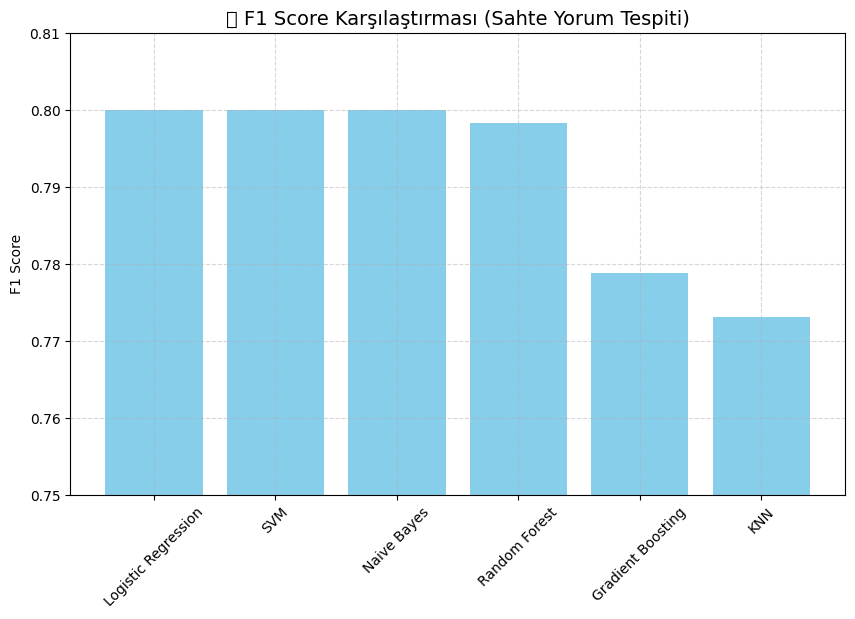

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(df_results["Model"], df_results["F1 Score"], color='skyblue')
plt.title("📈 F1 Score Karşılaştırması (Sahte Yorum Tespiti)", fontsize=14)
plt.ylabel("F1 Score")
plt.xticks(rotation=45)
plt.ylim(0.75, 0.81)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


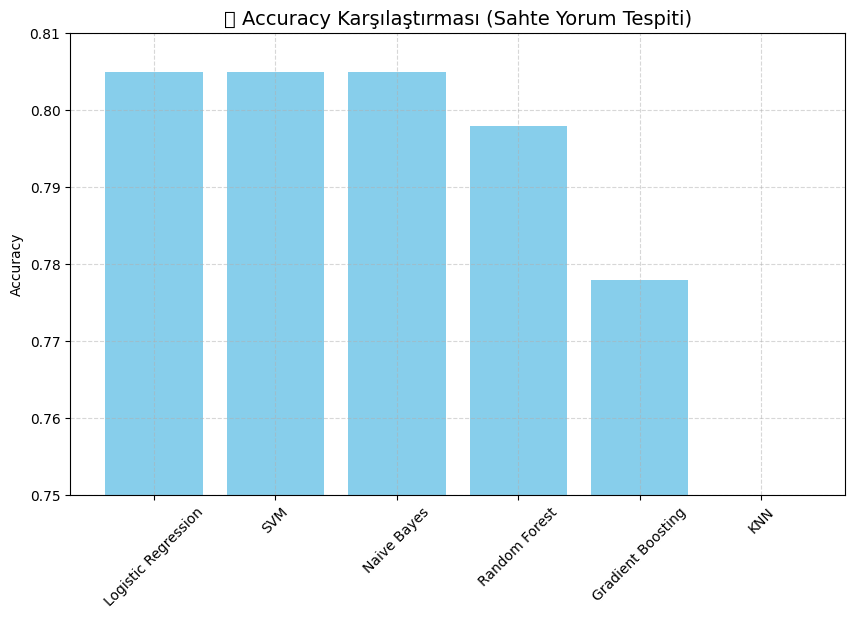

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(df_results["Model"], df_results["Accuracy"], color='skyblue')
plt.title("📈 Accuracy Karşılaştırması (Sahte Yorum Tespiti)", fontsize=14)
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.ylim(0.75, 0.81)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()
